In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv",sep="\t")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df[100:105]

,label,message,length,punct
100,ham,Please don't text me anymore. I have nothing e...,57,3
101,ham,Okay name ur price as long as its legal! Wen c...,81,2
102,ham,I'm still looking for a car to buy. And have n...,76,3
103,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
104,ham,wow. You're right! I didn't mean to do that. I...,183,8


In [ ]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

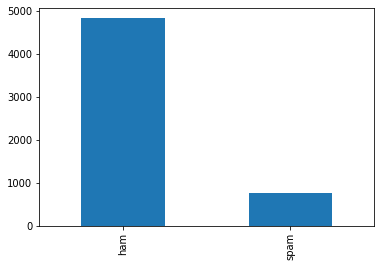

In [ ]:
import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind="bar")

plt.show()

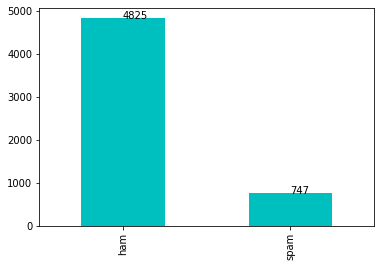

In [ ]:
df["label"].value_counts().plot(kind="bar",color="c")
a=df["label"].value_counts()
plt.text(0,a[0],a[0])
plt.text(1,a[1],a[1])
plt.show()

In [ ]:
df.shape

(5572, 4)

In [ ]:
df["message"][5568]

'Will ü b going to esplanade fr home?'

In [ ]:
df["message"][5567]

'This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [ ]:
x=df["message"].values
y=df["label"].values

In [ ]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)




(4179,)
(1393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english")

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=model.predict(x_test_vect)

In [ ]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,y_pred)

0.9813352476669059

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1234
        spam       0.86      1.00      0.92       159

    accuracy                           0.98      1393
   macro avg       0.93      0.99      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
test=df["message"][3000]
test

'Oh, then your phone phoned me but it disconnected'

In [ ]:
df["label"][3000]

'ham'

In [ ]:
test=vect.transform([df["message"][3000]])
model.predict(test)

array(['ham'], dtype=object)

In [ ]:
test=df["message"][2003]
test

'TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...'

In [ ]:
df["label"][2003]

'spam'

In [ ]:
test=vect.transform([df["message"][2003]])
model.predict(test)

array(['spam'], dtype=object)

In [ ]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())
text_model.fit(x_train,y_train)
y_pred=text_model.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
text_model.predict([df["message"][0]])

array(['ham'], dtype=object)

In [ ]:
import joblib

In [ ]:
joblib.dump(text_model,"spam-ham")

['spam-ham']